In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df_sep = df[['sepal length (cm)', 'sepal width (cm)']]
df_sep.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


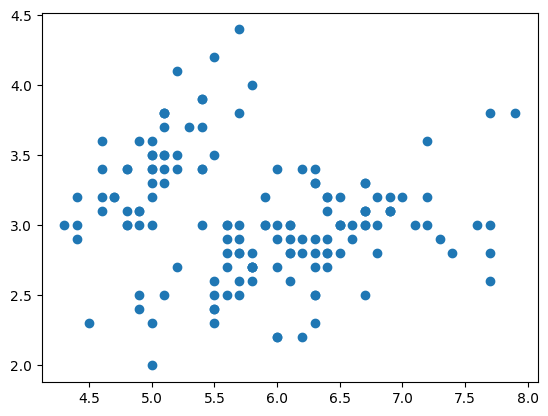

In [13]:
plt.scatter(df_sep['sepal length (cm)'], df_sep['sepal width (cm)'])

In [12]:
scaler = MinMaxScaler()

In [15]:
df_sep['sepal length (cm)'] = scaler.fit_transform(df_sep[['sepal length (cm)']])
df_sep['sepal width (cm)'] = scaler.fit_transform(df_sep[['sepal width (cm)']])
df_sep.head()

C:\Users\divya\AppData\Local\Temp\ipykernel_33908\4282565039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sep['sepal length (cm)'] = scaler.fit_transform(df_sep[['sepal length (cm)']])
C:\Users\divya\AppData\Local\Temp\ipykernel_33908\4282565039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sep['sepal width (cm)'] = scaler.fit_transform(df_sep[['sepal width (cm)']])


,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


In [18]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_sep[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)

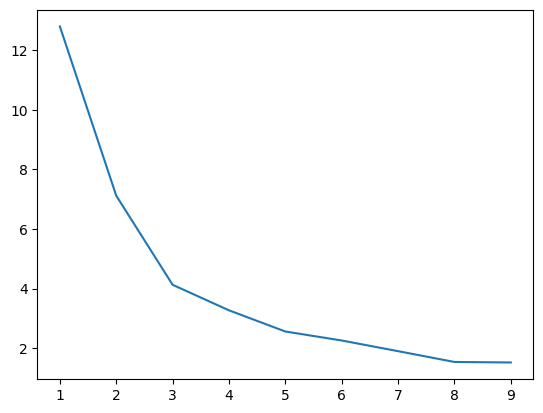

In [19]:
plt.plot(k_rng, sse)

In [21]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_sep[['sepal length (cm)', 'sepal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [22]:
df_sep['cluster'] = y_predicted
df_sep.head()

C:\Users\divya\AppData\Local\Temp\ipykernel_33908\3276577126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sep['cluster'] = y_predicted


,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


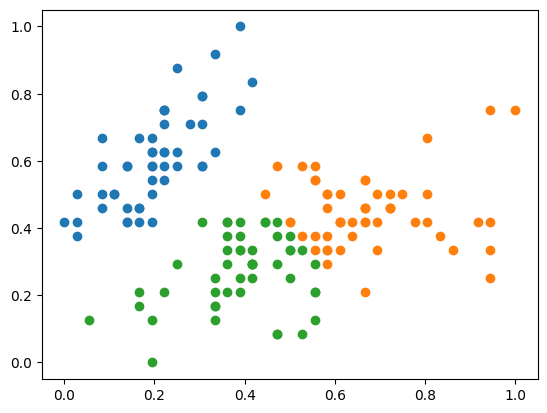

In [23]:
df1 = df_sep[df_sep.cluster==0]
df2 = df_sep[df_sep.cluster==1]
df3 = df_sep[df_sep.cluster==2]
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'])
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'])